In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Generating random linear dataset with 200 entries

In [14]:
X = np.random.rand(200, 1)

y = 2.5 + 5*X + np.random.rand(200, 1)

print(X.shape, y.shape)

(200, 1) (200, 1)


In [15]:
X[:10]

array([[0.13684306],
       [0.09951283],
       [0.64313606],
       [0.37636164],
       [0.57326545],
       [0.03156157],
       [0.60199062],
       [0.62763874],
       [0.35007998],
       [0.0144828 ]])

In [16]:
y[:10]

array([[3.81608368],
       [3.40323274],
       [6.58371462],
       [4.94054365],
       [5.81476832],
       [2.96298538],
       [6.2065142 ],
       [6.17849176],
       [5.19430741],
       [2.82985048]])

### The below class `UniLinearRegression` can be used to train and predict a univariate linear model.

In [117]:
class UniLinearRegression():
    
    def __init__(self):
        self.costs = []
        
    def predict(self, X, weight, bias):
        """Arguments: X_train, weight, bias
        
           returns: predicted values"""
        
        pred = X * weight + bias
        return pred
    
    def mean_squared_error(self, pred, labels):
        """ Arguments: predicted_values, true_labels
        
            returns: cost(error)"""
    
        assert len(pred) == len(labels), 'Length of labels and predictions should be same.'

        # cost = 1/m * sum(labels - pred)**2

        cost = np.sum((labels-pred)**2)
        cost = cost/len(pred)

        return cost
    
    def gradient_descent(self, X, y, weight, bias):
        """ Arguments: X_train, y_train, weight, bias
            
            returns: bias_gradient, weight_gradient"""

        weight_grad = (-2 * np.dot(X.T, y - (bias + weight*X)))/len(y)
        bias_grad = (-2 * np.sum(y - (bias + weight*X)))/len(y)

        return (bias_grad, weight_grad)
    
    def train(self, X, y, iterations, weight=0.0, bias=0.0, learning_rate=0.1, print_cost=True):
        """ Arguments: X_train, 
                       y_train, 
                       iterations, 
                       weight => by default 0.0,
                       bias => by default 0.0,
                       learning_rate => by default 0.1,
                       print_cost => by default True
        
            returns: learned_bias, learned_weight"""
        for i in range(1, iterations+1):
    
            # predicting values
            prediction = self.predict(X, weight, bias)

            #calculating cost
            cost = mean_squared_error(prediction, y)

            if i % 10 == 0:
                self.costs.append(cost)
                if print_cost:
                    print(f'Cost after {i}th iteration - {cost}')

            # calculating gradients
            bias_grad, weight_grad = gradient_descent(X, y, weight, bias)

            # updating weights
            weight = weight - learning_rate * weight_grad
            bias = bias - learning_rate * bias_grad
            
        return (bias, weight)

#### Trained a model by calling `train()` on UniLinearRegression object

In [130]:
uni_reg = UniLinearRegression()
bias, weight = uni_reg.train(X, y, 200)

Cost after 10th iteration - 0.7098013169666941
Cost after 20th iteration - 0.43189961995832815
Cost after 30th iteration - 0.3466625235618865
Cost after 40th iteration - 0.28228497646159095
Cost after 50th iteration - 0.23338147034167492
Cost after 60th iteration - 0.19623176695153163
Cost after 70th iteration - 0.16801087457042022
Cost after 80th iteration - 0.14657278235483895
Cost after 90th iteration - 0.13028726623303155
Cost after 100th iteration - 0.11791592121377242
Cost after 110th iteration - 0.10851798893819631
Cost after 120th iteration - 0.10137881927484761
Cost after 130th iteration - 0.0959555259388723
Cost after 140th iteration - 0.09183570360728802
Cost after 150th iteration - 0.08870606724201315
Cost after 160th iteration - 0.08632862885012887
Cost after 170th iteration - 0.08452260008272316
Cost after 180th iteration - 0.08315064448554295
Cost after 190th iteration - 0.08210843397671587
Cost after 200th iteration - 0.08131671539125865


### Predicting values using learned weight and bias

`train()` returns learned bias and weight, which we'll use to predict.

In [131]:
y_pred = uni_reg.predict(X, weight, bias)

### Now we'll plot the learned regression model

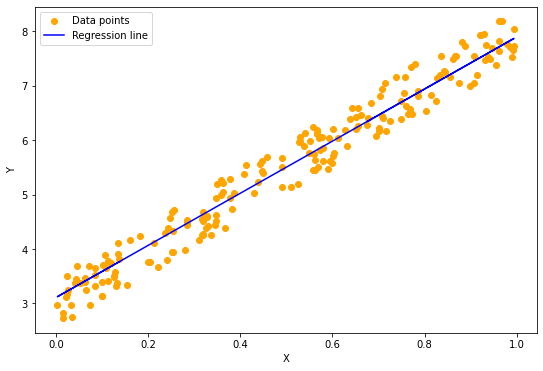

In [132]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y, color='orange', label='Data points')
plt.plot(X, y_pred, color='blue', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Visualizing Cost vs Iterations
This shows how cost value decreases with the no. of iterations

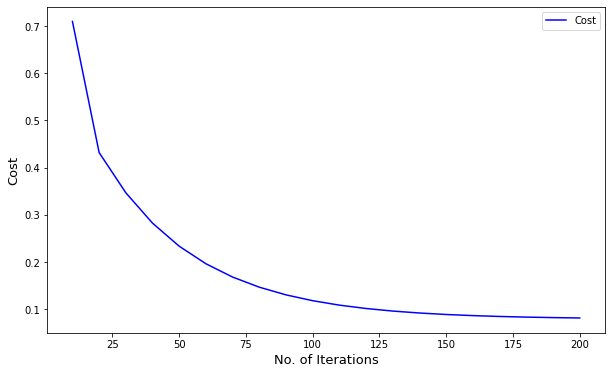

In [133]:
iterations = [i*10 for i in range(1, len(uni_reg.costs)+1)]
plt.figure(figsize=(10, 6))
plt.plot(iterations, uni_reg.costs, color='blue', label='Cost')
plt.xlabel('No. of Iterations', fontsize=13)
plt.ylabel('Cost', fontsize=13)
plt.legend()
plt.show()
# iterations

### Univariate Linear Regression on Yield_vs_Temperature Dataset

In [158]:
df1 = pd.read_csv('/Users/anike/ML/MLA 1 Lab/Yield_vs_Temperature.csv')
df1.head()

,Observation Number,Temperature (Xi),Yield (Yi)
0,1,50,122
1,2,53,118
2,3,54,128
3,4,55,121
4,5,56,125


In [159]:
X = df1['Temperature (Xi)'].values
y = df1['Yield (Yi)'].values

X = X.reshape((len(X), 1))
y = y.reshape((len(y), 1))

print(X.shape, y.shape)

(25, 1) (25, 1)


In [160]:
# normalizing data
X = (X - np.mean(X))/(np.max(X)-np.min(X))
X

array([[-0.4968],
       [-0.4368],
       [-0.4168],
       [-0.3968],
       [-0.3768],
       [-0.3168],
       [-0.2568],
       [-0.1968],
       [-0.1568],
       [-0.0768],
       [-0.0568],
       [-0.0168],
       [ 0.0032],
       [ 0.0232],
       [ 0.0832],
       [ 0.1032],
       [ 0.1432],
       [ 0.2032],
       [ 0.2432],
       [ 0.3032],
       [ 0.3632],
       [ 0.3832],
       [ 0.4032],
       [ 0.4432],
       [ 0.5032]])

In [161]:
uni_reg = UniLinearRegression()
bias, weight = uni_reg.train(X, y, 250)

Cost after 10th iteration - 1163.2260813124476
Cost after 20th iteration - 471.04461417564295
Cost after 30th iteration - 327.05192916943446
Cost after 40th iteration - 231.1443966393422
Cost after 50th iteration - 164.7315549051873
Cost after 60th iteration - 118.71244591022278
Cost after 70th iteration - 86.82431080838212
Cost after 80th iteration - 64.72798238220724
Cost after 90th iteration - 49.41671598661208
Cost after 100th iteration - 38.80704029175587
Cost after 110th iteration - 31.45525008435011
Cost after 120th iteration - 26.36095495147325
Cost after 130th iteration - 22.830951759228903
Cost after 140th iteration - 20.38489745490783
Cost after 150th iteration - 18.689946676156968
Cost after 160th iteration - 17.51546001929366
Cost after 170th iteration - 16.701619921726625
Cost after 180th iteration - 16.137683583635827
Cost after 190th iteration - 15.746913708361928
Cost after 200th iteration - 15.476136521102415
Cost after 210th iteration - 15.288506179616261
Cost after 

In [162]:
y_pred = bias + weight*X

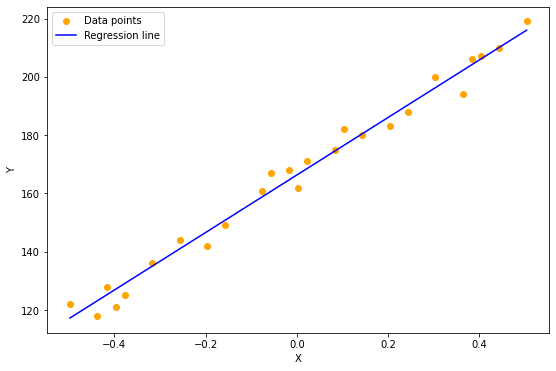

In [163]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y, color='orange', label='Data points')
plt.plot(X, y_pred, color='blue', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Univariate Linear Regression on Sin2x Dataset

In [167]:
df2 = pd.read_csv('/Users/anike/ML/MLA 1 Lab/sin2x.csv')
df2.head()

,x,y
0,0.1,0.499167
1,0.2,0.993347
2,0.3,1.477601
3,0.4,1.947092
4,0.5,2.397128


In [169]:
X = df2['x'].values
y = df2['y'].values

X = X.reshape((len(X), 1))
y = y.reshape((len(y), 1))

print(X.shape, y.shape)

(42, 1) (42, 1)


In [173]:
uni_reg = UniLinearRegression()
bias, weight = uni_reg.train(X, y, 100)

Cost after 10th iteration - 7.2081319242477555
Cost after 20th iteration - 5.349174002264532
Cost after 30th iteration - 4.60263107373895
Cost after 40th iteration - 4.30282527886076
Cost after 50th iteration - 4.182425619031337
Cost after 60th iteration - 4.134074058338753
Cost after 70th iteration - 4.114656450143508
Cost after 80th iteration - 4.106858490726617
Cost after 90th iteration - 4.103726891280587
Cost after 100th iteration - 4.102469265462591


In [174]:
y_pred = bias + weight*X

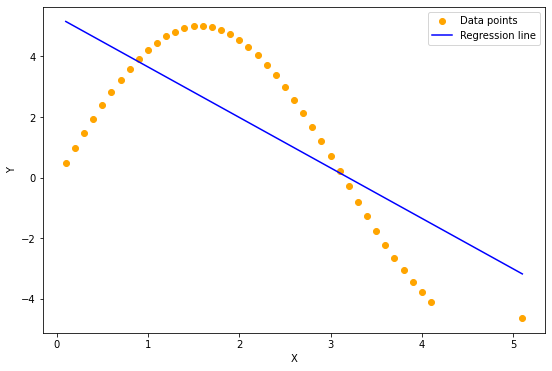

In [175]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y, color='orange', label='Data points')
plt.plot(X, y_pred, color='blue', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [177]:
## As the sin function gives a curve, linear regression will not be able to fit this function, polynomial regression might 
## be a good idea.